In [1]:
import ase
from ase.db import connect
import json
from io import StringIO
from pymatgen.core import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from ase.io import read
import numpy as np

In [2]:
structures_layered = []
known_layered_mpid = []
with open("data/2d_db.json", "r") as fd:
    for line in fd.readlines():
        calc_dict = json.loads(line)
        st = Structure.from_dict(calc_dict["structure"])
        structures_layered.append(st)
        source_mpid = calc_dict["source_id"]
        if source_mpid not in known_layered_mpid:
            known_layered_mpid.append(source_mpid)

In [3]:
density_layered = np.array([st.density for st in structures_layered])

In [10]:
# bulk data from OC20
bulk_db = connect("data/bulks.db")

In [11]:
def get_density_atoms(atoms):
    structure = AseAtomsAdaptor.get_structure(atoms)
    return structure.density

density_bulk = np.array([get_density_atoms(r.toatoms()) for r in bulk_db.select() if r.mpid not in known_layered_mpid])

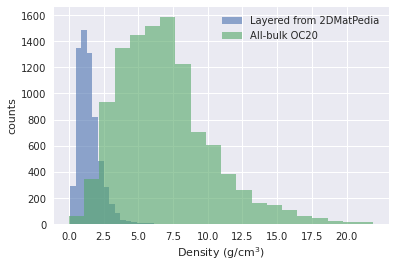

In [12]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.figure(figsize=(6, 4))
plt.hist(density_layered, label="Layered from 2DMatPedia", bins=20, alpha=0.6)
plt.hist(density_bulk, label="All-bulk OC20", bins=20, alpha=0.6)
plt.xticks(np.arange(0, 22, 2.5))
plt.legend()
plt.ylabel("counts")
plt.xlabel("Density (g/cm$^3$)")
plt.savefig("dens-compare.pdf")

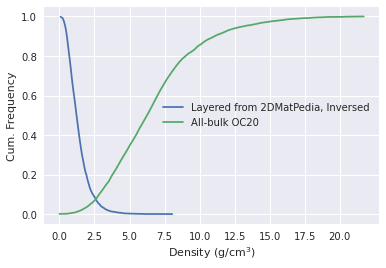

In [19]:
plt.figure(figsize=(6, 4))
freq_l, dens_l = np.histogram(density_layered, bins=100)
freq_b, dens_b = np.histogram(density_bulk, bins=100)
sum_l = np.cumsum(freq_l)
sum_b = np.cumsum(freq_b)
plt.plot(dens_l[:-1], 1 - (sum_l / sum_l[-1]), label="Layered from 2DMatPedia, Inversed")
plt.plot(dens_b[:-1], sum_b / sum_b[-1], label="All-bulk OC20")
plt.xticks(np.arange(0, 22, 2.5))
plt.legend()
plt.ylabel("Cum. Frequency")
plt.xlabel("Density (g/cm$^3$)")
plt.savefig("cum-dens-dist.pdf")

In [25]:
outline_l = 1 - sum_l[dens_l[:-1] < 2.5][-1] / sum_l[-1]
outline_b = sum_b[dens_b[:-1] < 2.5][-1] / sum_b[-1]

In [26]:
print("Outliner percentage for layered if threshold=2.5: ", outline_l)
print("Outliner percentage for bulk if threshold=2.5: ", outline_b)

Outliner percentage for layered if threshold=2.5:  0.0881750905369233
Outliner percentage for bulk if threshold=2.5:  0.06217616580310881
